### 해운대구 전체 인구현황에서 노인의 비율이 얼마나 되는지 확인

노인 기준?
현재 노인복지법에 따르면 만 65세 이상을 노인으로 규정짓고있다
하지만 최근 70대 부터를 노인으로 보자는 시선과 함께 현재 데이터 형식의 한계로 인하여
70세부터 노인으로 규정짓겠다.

In [1]:
import pandas as pd
population = pd.read_csv('부산광역시 해운대구_인구현황_20230430.csv', encoding='cp949')
population['연령']=population['연령'].str.replace(' ', '')

# 비노인 세대
not_old = ['0세-9세','10세-19세','20세-29세','30세-39세','40세-49세','50세-59세','60세-69세']

def check_in_b(row):
    if row['연령'] in not_old:
        return False
    else:
        return True

population['old?'] = population.apply(check_in_b, axis=1)

전체 인구수 대비 노인 비율

In [2]:
total = (population['인구수']).sum()
bunja = (population[population['old?']==True]['인구수']).sum()
ratio = round(bunja/total,3)
print(f'전체인구: {total}명, 노인인구: {bunja}명, 고령화비율: {round(ratio*100)}%')

전체인구: 384335명, 노인인구: 49778명, 고령화비율: 13%


전체 인구수 대비 노인 비율 시각화

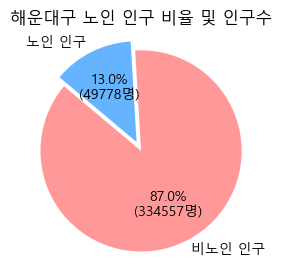

In [20]:
import matplotlib.pyplot as plt
# 전체 인구수와 노인 인구수 계산
total = (population['인구수']).sum()
bunja = (population[population['old?']==True]['인구수']).sum()

# 비노인 인구수 계산
non_old_population = total - bunja

# 파이 차트 데이터 준비
sizes = [non_old_population, bunja]
labels = ['비노인 인구', '노인 인구']
colors = ['#ff9999', '#66b3ff']  # 색상 설정
explode = (0, 0.1)  # 노인 인구 부분을 조금 돌출시킴

# 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 각 부분의 라벨과 비율 및 실제 수치 포맷팅
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d}명)'.format(p=pct,v=val)
    return my_autopct

# 파이 차트 그리기
plt.figure(figsize=(3, 3))  # 차트 크기 설정
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=140)
plt.title('해운대구 노인 인구 비율 및 인구수')  # 차트 제목 설정
plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.show()


동별 고령화비율

In [14]:
dong_list = population['동명'].unique()
dong_list
result_data = []
for dong in dong_list:
    dong_data = population[population['동명']==dong]
    total = dong_data['인구수'].sum()
    bunja = (dong_data[dong_data['old?']==True]['인구수']).sum()
    ratio = round(bunja/total,3)
    result_data.append({'동명': dong, '노인인구수': bunja, '전체인구': total, '노인비율': ratio*100})
    result_df = pd.DataFrame(result_data)

result_df=result_df.rename(columns={'노인비율': '고령화비율(%)'})
result_df
    

,동명,노인인구수,전체인구,고령화비율(%)
0,우제1동,3235,22171,14.6
1,우제2동,3411,30155,11.3
2,우제3동,3091,28129,11.0
3,중제1동,2996,27341,11.0
4,중제2동,1731,15354,11.3
5,좌제1동,1872,17559,10.7
6,좌제2동,3327,31067,10.7
7,좌제3동,2216,15531,14.3
8,좌제4동,2347,22419,10.5
9,송정동,1724,9548,18.1


독거노인 현황

In [10]:
alone = pd.read_csv('부산광역시 해운대구_독거노인 현황_20240213.csv',encoding='cp949')
alone.drop(columns=['연번','시도명','시군구명'],axis=1,inplace=True)
alone.sort_values('합계(명)',ascending=False)

,행정동명,남자(명),여자(명),합계(명)
15,반송2동,1025,2232,3257
14,반송1동,631,1320,1951
17,재송2동,482,1117,1599
11,반여2동,455,1039,1494
10,반여1동,381,910,1291
0,우1동,406,885,1291
6,좌2동,235,869,1104
3,중1동,320,782,1102
16,재송1동,307,736,1043
1,우2동,247,781,1028


In [15]:
total_alone = alone['합계(명)'].sum()
total = result_df['전체인구'].sum()
print(f'전체인구: {total}명, 독거노인인구: {total_alone}명, 독거노인비율: {round((total_alone/total)*100)}%')

전체인구: 384335명, 독거노인인구: 21341명, 독거노인비율: 6%


독거 노인 비율 시각화

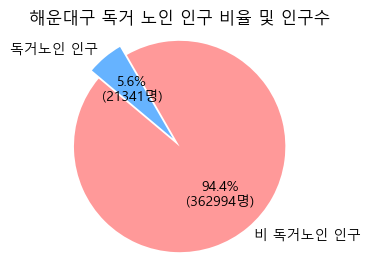

In [21]:
# 비독거노인 인구수 계산
non_alone_old_population = total - total_alone

# 파이 차트 데이터 준비
sizes = [non_alone_old_population, total_alone]
labels = ['비 독거노인 인구', '독거노인 인구']
colors = ['#ff9999', '#66b3ff']  # 색상 설정
explode = (0, 0.1)  # 노인 인구 부분을 조금 돌출시킴

# 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 각 부분의 라벨과 비율 및 실제 수치 포맷팅
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d}명)'.format(p=pct,v=val)
    return my_autopct

# 파이 차트 그리기
plt.figure(figsize=(3, 3))  # 차트 크기 설정
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=140)
plt.title('해운대구 독거 노인 인구 비율 및 인구수')  # 차트 제목 설정
plt.axis('equal')  # 원형 차트가 원형으로 보이도록 설정
plt.show()


In [22]:
alone_ratio = round(alone['합계(명)']/result_df['노인인구수'],3)
alone_elders = result_df.copy()
alone_elders['독거노인수']=alone['합계(명)']
alone_elders['노인_대비_독거노인비율(%)']=alone_ratio*100
alone_elders['전체인구중_독거노인비율(%)']=round(alone_elders['독거노인수']/alone_elders['전체인구'],3)*100
alone_elders=alone_elders[['동명','전체인구','독거노인수','전체인구중_독거노인비율(%)']]
alone_elders

,동명,전체인구,독거노인수,전체인구중_독거노인비율(%)
0,우제1동,22171,1291,5.8
1,우제2동,30155,1028,3.4
2,우제3동,28129,818,2.9
3,중제1동,27341,1102,4.0
4,중제2동,15354,816,5.3
5,좌제1동,17559,689,3.9
6,좌제2동,31067,1104,3.6
7,좌제3동,15531,826,5.3
8,좌제4동,22419,720,3.2
9,송정동,9548,813,8.5


해운대 종합병원 현황

In [6]:
general_hospital_in_haeundae = pd.read_csv('부산광역시_종합병원 현황_20230927.csv',encoding='cp949')
general_hospital_in_haeundae.drop(['연번','대표자'],axis=1,inplace=True)
general_hospital_in_haeundae=general_hospital_in_haeundae[general_hospital_in_haeundae['도로명주소'].str.contains('해운대')]
ghih = general_hospital_in_haeundae.drop(columns=['전화번호','일반','정신','인허가일자'],axis=1)
ghih

,의료기관명,도로명주소,위도,경도,계
26,의료법인 인당의료재단 해운대부민병원,부산광역시 해운대구 해운대로 584 (우동),35.161420,129.155656,357
27,인제대학교 해운대백병원,부산광역시 해운대구 해운대로 875 (좌동),35.173343,129.182181,890


## 종합병원 시각화

In [30]:
import folium
location1 = [35.161420,129.155656]
location2 = [35.173343,129.128181]
l1 = folium.Map(location=location1, zoom_start=14,width='80%',height='70%')
folium.Marker(location1).add_to(l1)
folium.Marker(location2).add_to(l1)
l1

### 해운대구 의료기관 현황

In [2]:
hospitals = pd.read_csv('부산광역시 해운대구_의료기관 현황_20230620.csv',encoding='cp949')
hospitals.drop(['순번','의료기관명','의료기관전화번호'],axis=1,inplace=True)
# 정규 표현식을 사용하여 '동'으로 끝나는 단어 추출
# 괄호 안에 있으며, '동'으로 끝나는 첫 번째 단어에 대해 매칭
hospitals['동'] = hospitals['의료기관주소(도로명)'].str.extract(r'\(([^,)]*동)')
hospitals.drop('의료기관주소(도로명)',axis=1,inplace=True)
hospitals = hospitals[['의료기관종별','동']].astype('category')

### 해운대구 의료기관 종류별 분포

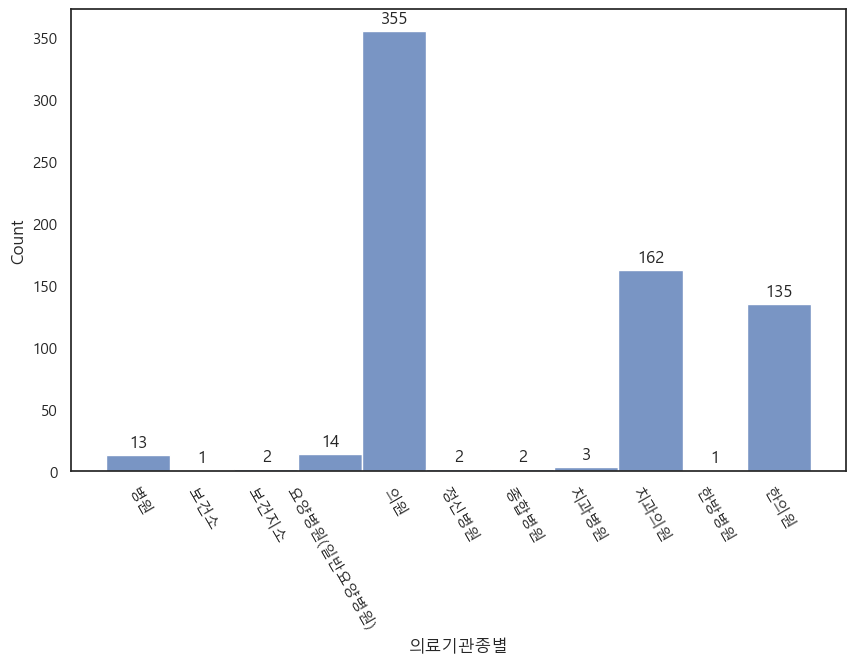

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프의 전체적인 설정
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

# 그래프의 크기 설정
plt.figure(figsize=(10, 6)) # 여기서 그래프의 크기를 조정할 수 있습니다.

# 히스토그램 그리기
ax = sns.histplot(data=hospitals, x='의료기관종별')

# x축 라벨의 각도 조정
plt.xticks(rotation=-60)

# 각 막대 위에 수치 표시하기
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()


### 동별 의료기관 분포

In [4]:
#동별 의료기관 분포
grouped = hospitals.groupby(['동','의료기관종별']).size().reset_index(name='수')
grouped.groupby(['동','의료기관종별']).sum()


수
동   의료기관종별          
반송동 병원             0
    보건소            0
    보건지소           1
    요양병원(일반요양병원)   2
    의원            25
...               ..
중동  종합병원           0
    치과병원           1
    치과의원          24
    한방병원           0
    한의원           17

[77 rows x 1 columns]

In [8]:
import pandas as pd

# 가정: hospitals는 이미 정의된 pandas DataFrame이며, '동'과 '의료기관종별' 컬럼을 포함하고 있음

# 동별, 의료기관 종별로 그룹화하고, 각 그룹의 크기 계산
grouped = hospitals.groupby(['동', '의료기관종별']).size().reset_index(name='수')

# 특정 동(예: '강남동')의 의료기관 분포 확인
specific_dong = '반송동'
specific_dong_distribution = grouped[(grouped['동'] == specific_dong) & (grouped['수']!=0)]

specific_dong_distribution


,동,의료기관종별,수
2,반송동,보건지소,1
3,반송동,요양병원(일반요양병원),2
4,반송동,의원,25
8,반송동,치과의원,12
10,반송동,한의원,9


### 노인 주간 보호 센터 현황

In [11]:
protect_noin = pd.read_csv('부산광역시 해운대구_노인주간보호센터_20230517.CSV',encoding='cp949')
protect_noin['동'] = protect_noin['소재지지번주소'].str.extract(r'([가-힣0-9]+동)\b')
protect_noin.drop('소재지지번주소',axis=1,inplace=True)
protect_noin['동']=protect_noin['동'].str.replace('1','')
protect_noin['동']=protect_noin['동'].str.replace('2','')
protect_noin['동']=protect_noin['동'].str.replace('3','')
protect_noin['동']=protect_noin['동'].astype('category')
protect_noin = protect_noin.groupby('동').size().reset_index(name='수')
protect_noin

,동,수
0,반송동,4
1,반여동,5
2,석대동,1
3,송정동,1
4,우동,4
5,재송동,4
6,좌동,11
